## KMeans
### K : 分幾群
* k 已知
* k 未知
---
### 運作方式
1. 先選其中幾點做起始點
2. 把剩餘的點份到各個起點成為群
3. 重新在個群中挑新的點作為原點以修正
4. 重複直到不需再重新挑選

In [20]:
%matplotlib inline
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [22]:
# assamble data to a DataFrame
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [23]:
from sklearn.model_selection import train_test_split

# df.drop 回傳新的，不改舊的
x_train, x_test, y_train, y_test = train_test_split(df.drop(["target"], axis=1), df["target"], test_size=0.2)

In [24]:
from sklearn.cluster import KMeans

#已知有幾種可指定k值
clu = KMeans(n_clusters=3)
clu.fit(x_train)

KMeans(n_clusters=3)

In [25]:
# ‘k-means++’ : 最初的點選遠一點
#selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
print(clu.init)

k-means++


In [26]:
# KMeans的Attr中 labels 為分群結果
# 標註的對應 =/= 監督學習對應的 0, 1, 2
clu.labels_

array([2, 1, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 1, 0, 0, 2, 2, 1,
       2, 1, 1, 0, 2, 0, 0, 2, 1, 1, 0, 2, 1, 0, 2, 1, 2, 1, 2, 2, 0, 0,
       0, 0, 1, 2, 2, 1, 0, 2, 1, 2, 2, 1, 0, 2, 1, 0, 1, 1, 2, 1, 0, 2,
       1, 1, 2, 0, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0,
       0, 1, 0, 2, 2, 1, 1, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 1,
       0, 2, 2, 0, 2, 2, 0, 0, 1, 0], dtype=int32)

In [27]:
# 驗證結果好壞
# 若分數很低，可能是分群的label對應與預設答案標記方式不相符
from sklearn.metrics import accuracy_score

pre = clu.predict(x_test)
print('predict: ', list(pre))
print('reality: ', list(y_test))

score = str(accuracy_score(pre, y_test) * 100)[:5] + ' %'
print("成功率:", score)

predict:  [0, 0, 2, 2, 1, 2, 1, 1, 0, 2, 0, 1, 2, 0, 2, 1, 1, 2, 1, 0, 1, 0, 2, 2, 2, 0, 0, 2, 1, 1]
reality:  [0, 0, 1, 2, 2, 1, 2, 2, 0, 1, 0, 2, 2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 2, 1, 1, 0, 0, 2, 2, 2]
成功率: 46.66 %


---

# 不知道 k 值時的策略
### 理想狀態：與同群點的距離(a) < 與不同群點的距離(b)
### sihouette score = 1 - a/b (值越大越好，可協助決定k值)

In [32]:
x = df.drop(["target"], axis=1) #分群沒有答案，所以drop掉target

from sklearn.metrics import silhouette_score

plotx, ploty = [], []
# 透過做 2, 3, 4, 5 次來觀察
for k in range(2, 6):
    clu = KMeans(n_clusters=k)
    clu.fit(x)
    s = silhouette_score(x, clu.labels_)
    plotx.append(k)
    ploty.append(s)
print("K值: ", plotx)
print("Score: ", ploty)

K值:  [2, 3, 4, 5]
Score:  [0.681046169211746, 0.5528190123564091, 0.4980505049972867, 0.4887488870931048]


---

Text(0, 0.5, 'Score')

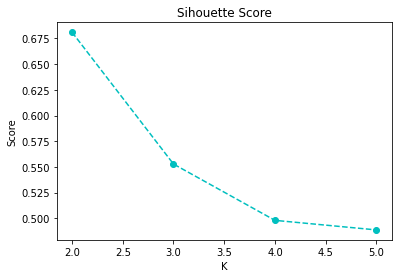

In [39]:
# [ matplotlib.pyplot.plot format ] 
# https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.plot.html
plt.plot(plotx, ploty, 'co--')
plt.title("Sihouette Score")
plt.xlabel("K")
plt.ylabel("Score")